#  Machine Learning Project - EE_475


## Detection of Diseases in Plants

### **Group 1**
* Shamika Likhite : SLA7577
* Shagun  Lahoti  : SLT0989
* Adheik  Dominic : ADO6426

**Overview**

The code below demonstrates a supervised machine learning model that is used to detect and classify the plant diseases into its respective categories. The dataset that is used throughout the project is the Plant_disease Dataset obtained from an open-source platform and was contributed by SAMIR BHATTARAI. The plant diseases are categorised into the types that are listed in the dataset which are a total of 38. The model is able to classify these diseases accurately and can further be evolved by expermienting around with different architectures. We built and trained our own baseline model in *CNN* and checked the accuracy of the model which was about *71%*. To further improve our accuracy we used the base model as *EfficientNetB0* and applied the transfer learning technique to train the model to get accuracy to 81% The future scope of this project is to classify plants with dual diseases and sub-classify them into their respective sub-categories.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img

In [4]:
from tensorflow.keras.applications import EfficientNetB0

In [37]:
os.listdir('E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [6]:
len(os.listdir('E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [7]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.efficientnet import decode_predictions

In [9]:
train_datagen=ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train=train_datagen.flow_from_directory(directory='E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                        target_size=(256,256), batch_size=32)
val=val_datagen.flow_from_directory(directory='E:/NU courses/ML 475/Project/Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                   target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [11]:
t_img, label=train.next()

In [12]:
t_img.shape

(32, 256, 256, 3)

In [13]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im/180)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


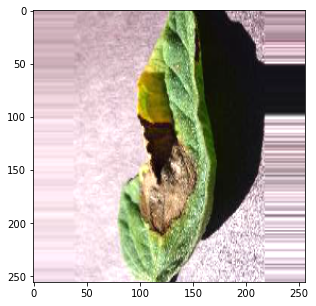

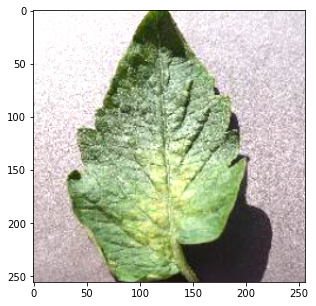

In [36]:
plotImage(t_img[:3], label[:2])

## Building our own Model

In [15]:
from tensorflow.keras.layers import Dense, Flatten

In [16]:
from tensorflow.keras.models import Model

In [17]:
import keras

In [18]:
base_model1=EfficientNetB0(input_shape=(256,256,3), include_top=False)

In [19]:
for layer in base_model1.layers:
    layer.trainable=False

In [20]:
X = Flatten()(base_model1.output)
X = Dense(units=38, activation='softmax')(X)

model=Model(base_model1.input, X)

### Early Stopping

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [23]:
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=3,verbose=1)

In [24]:
mc=ModelCheckpoint(filepath="my_model1.h5",monitor='val_accuracy', min_delta=0.01,patience=3, verbose=1,save_best_only=True)
cb=[es,mc]

In [25]:
his=model.fit(train,steps_per_epoch=16, epochs=50
              , verbose=1, callbacks=cb,validation_data=val,validation_steps=16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 9.5761 - accuracy: 0.2422
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to my_model1.h5
16/16 [==============================] - 100s 5s/step - loss: 9.5761 - accuracy: 0.2422 - val_loss: 5.0176 - val_accuracy: 0.4688
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 5.8366 - accuracy: 0.4980
Epoch 2: val_accuracy improved from 0.46875 to 0.66992, saving model to my_model1.h5
16/16 [==============================] - 75s 5s/step - loss: 5.8366 - accuracy: 0.4980 - val_loss: 3.2856 - val_accuracy: 0.6699
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 4.9217 - accuracy: 0.5938
Epoch 3: val_accuracy did not improve from 0.66992
16/16 [==============================] - 73s 5s/step - loss: 4.9217 - accuracy: 0.5938 - val_loss: 3.3295 - val_accuracy: 0.6426
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 4.0734 - accuracy: 0.6602
Epoch 4: val_accur

In [26]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

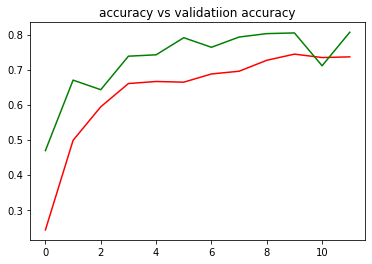

In [27]:
plt.plot(h['accuracy'],c='red')
plt.plot(h['val_accuracy'],c='green')
plt.title('accuracy vs validatiion accuracy')
plt.show()

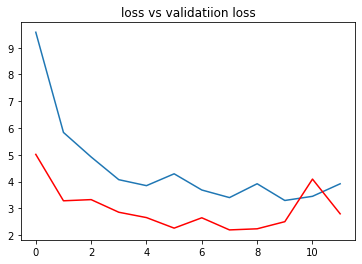

In [28]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs validatiion loss')
plt.show()

In [29]:
#load best model

from keras.models import load_model

In [30]:
model=load_model("C:/Users/shami/Downloads/my_model1.h5")

In [31]:
acc=model.evaluate(val)[1]
print(f"Accuracy of the model is {acc*100}%")

550/550 [==============================] - 1063s 2s/step - loss: 2.4383 - accuracy: 0.8131
Accuracy of the model is 81.31117820739746%


In [32]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

### Prediction of Image and classifying them

In [33]:
def Prediction(path):
    img=load_img(path, target_size=(256,256))
    i=img_to_array(img)
    im=preprocess_input(i)
    img=np.expand_dims(im,axis=0)
    pred=np.argmax(model.predict(img))

    print(f" The image belongs to {ref[pred]}")

In [34]:
path="E:/NU courses/ML 475/Project/PlantVillage/New Folder/Tomato_Spider_mites_Two_spotted_spider_mite/00c8e9a0-1fb8-434b-8981-25511358ddc9___Com.G_SpM_FL 8717.JPG"
Prediction(path)

1/1 [==============================] - 1s 1s/step
 The image belongs to Tomato___Spider_mites Two-spotted_spider_mite


**So, our model is predicting a correct disease!**

Here is the *[Link](https://www.youtube.com/watch?v=SQ2ZIfFTLJE)* for the youtube video for this project